In [4]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### I - Virat Kohli Dataset

In [46]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/virat.csv")

In [6]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [14]:
df.describe()

,Runs,BF,4s,6s,Pos,Inns
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,46.848485,50.871212,4.371212,0.545455,3.303030,1.575758
std,41.994635,38.729716,4.404032,1.086795,0.873174,0.496110
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,10.000000,17.750000,1.000000,0.000000,3.000000,1.000000
50%,32.500000,42.500000,3.000000,0.000000,3.000000,2.000000
75%,80.250000,82.250000,7.000000,1.000000,4.000000,2.000000
max,154.000000,140.000000,18.000000,7.000000,7.000000,2.000000


In [12]:
df.Runs = df.Runs.apply(lambda x: int(str(x).replace('*', '')) )

df.Runs.dtype

dtype('int64')

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


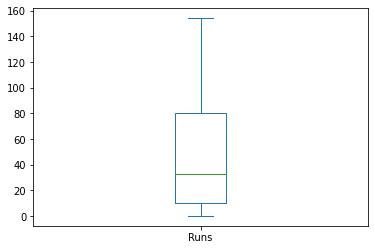

In [17]:
#Your code here
df.Runs.plot.box()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [18]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [24]:
## Your code here
df['year'] = pd.DatetimeIndex(df['Start Date']).year

df.groupby('year').agg({'Inns':'sum'}).sort_values(by='Inns', ascending = False)

,Inns
year,
2011,49
2013,36
2014,28
2010,26
2012,17
2016,16
2015,15
2009,9
2008,7


In [25]:
## Your code here
df['year'] = pd.DatetimeIndex(df['Start Date']).year

df.groupby('year').agg({'Runs':'mean'}).sort_values(by='Runs', ascending = False)

,Runs
year,
2016,73.900000
2017,61.666667
2014,58.529412
2013,47.826087
2010,45.375000
2011,42.000000
2012,40.363636
2009,38.333333
2008,31.800000


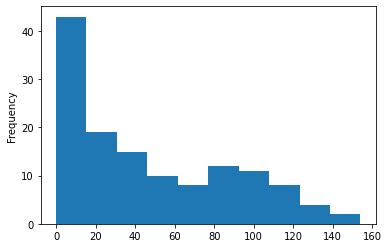

In [27]:
df['Runs'].plot.hist()

In [30]:
df['Start Date']= df['Start Date'].apply(lambda x: (x[-2:]))
df['Start Date'].value_counts()
# pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.mean)
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.max)

Start Date,08,09,10,11,12,13,14,15,16,17
Runs,54,107,118,117,128,115,139,138,154,122


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [48]:
df2 = df[~(df['Mins']== "-")]
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))

<ipython-input-48-30307feb622e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mins'] = df2['Mins'].apply(lambda x: int(x))


(array([28., 13., 12.,  9.,  6.,  6.,  9.,  4.,  9., 11.,  4.,  6.,  3.,
         2.,  4.]),
 array([  1. ,  14.4,  27.8,  41.2,  54.6,  68. ,  81.4,  94.8, 108.2,
        121.6, 135. , 148.4, 161.8, 175.2, 188.6, 202. ]),
 <a list of 15 Patch objects>)

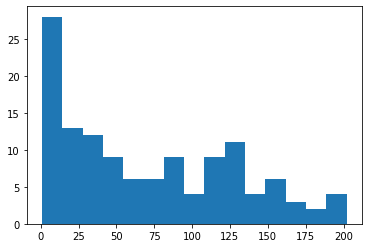

In [50]:
plt.hist(df2.Mins, bins =15)

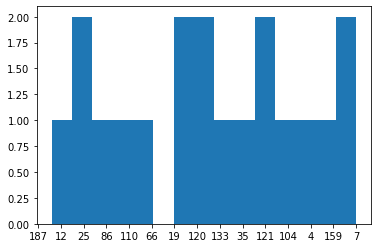

In [47]:
#Your code here
from matplotlib import pyplot as plt

plt.hist(df.Mins, bins = 15, range=[54.6,68])

plt.show()